<a href="https://colab.research.google.com/github/wendikardian/exercise_machine_learning/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

# Data Collection (From Kaggle)

In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wendikardian","key":"8c1011670f54dc1307d99bbedbf7767b"}'}

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [11]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

 97% 89.0M/92.1M [00:00<00:00, 156MB/s]
100% 92.1M/92.1M [00:00<00:00, 136MB/s]


In [12]:
!mkdir data
!unzip fake-news-classification.zip -d data
!ls data

mkdir: cannot create directory ‘data’: File exists
Archive:  fake-news-classification.zip
  inflating: data/WELFake_Dataset.csv  
WELFake_Dataset.csv


# Data Preparation & Understanding

In [13]:
import pandas as pd

df = pd.read_csv('data/WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [15]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [16]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [17]:
df = df.dropna(subset=['title', 'text'])

In [18]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [19]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [20]:
label_counts = df['label'].value_counts()

print("Fake News (label 0):", label_counts[0])
print("Real News (label 1):", label_counts[1])


Fake News (label 0): 35028
Real News (label 1): 36509


# Data Visualization

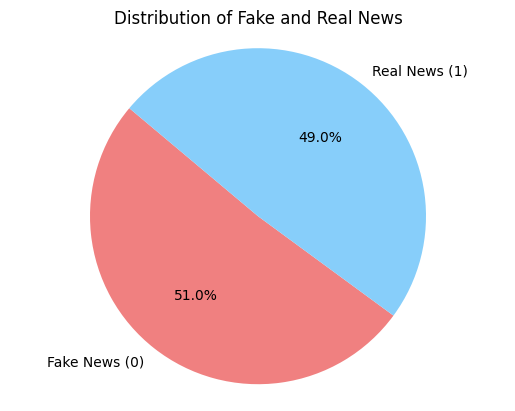

In [21]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

labels = ['Fake News (0)', 'Real News (1)']
sizes = label_counts.values
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Fake and Real News')
plt.show()


In [28]:
import pandas as pd


fake_news = df[df['label'] == 0].head(5000)
true_news = df[df['label'] == 1].head(5000)


df = pd.concat([fake_news, true_news], ignore_index=True)


df

,Unnamed: 0,title,text,label
0,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
1,11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0
2,12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
3,14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
4,15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0
...,...,...,...,...
9995,9688,Buffalo Bills Coach Gives Donald Trump The We...,"Buffalo Bills coach Rex Ryan has one job, to i...",1
9996,9689,SCARAMUCCI ON WH LEAKS: “If you’re going to ke...,It s about time! The White House has been leak...,1
9997,9690,LEFTIST PROF WHO WANTS “Earth Constitution” Wi...,Why would the Vatican invite an aggressive lef...,1
9998,9691,BOMBSHELL: Political Assassination Of Mike Fly...,Much of the political world was shocked by the...,1


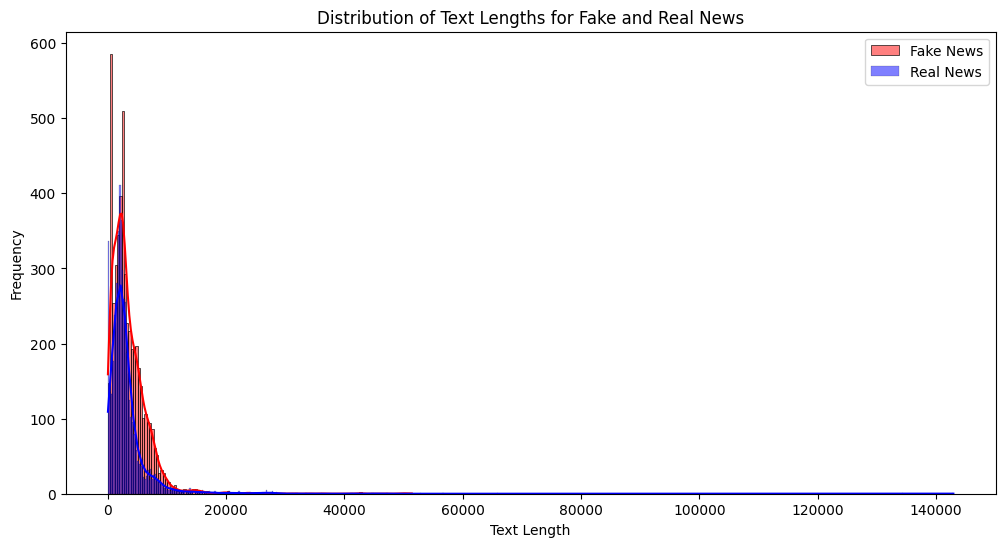

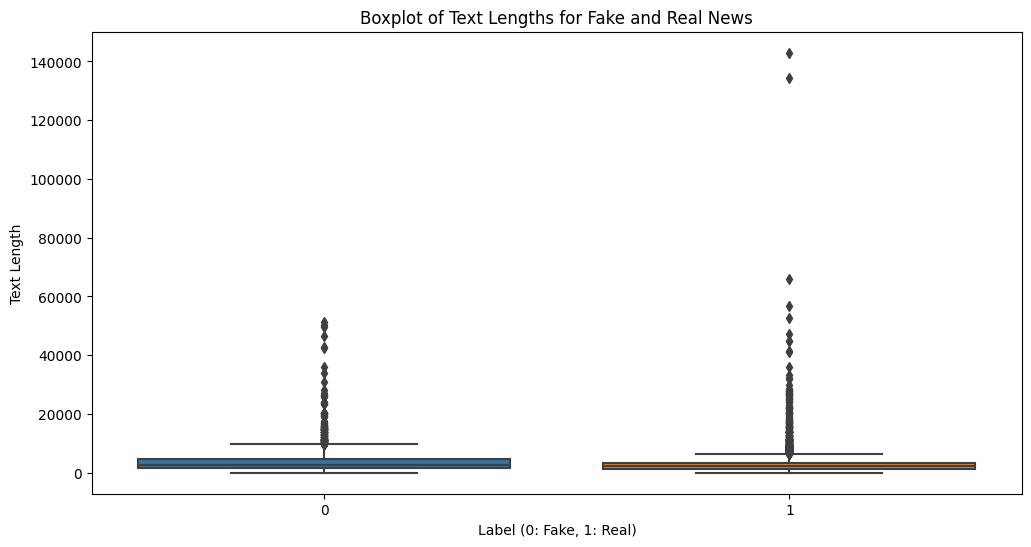

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fake_news_text_lengths = df[df['label'] == 0]['text'].apply(len)
real_news_text_lengths = df[df['label'] == 1]['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(fake_news_text_lengths, color='red', label='Fake News', kde=True)
sns.histplot(real_news_text_lengths, color='blue', label='Real News', kde=True)
plt.title('Distribution of Text Lengths for Fake and Real News')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_length', data=df.assign(text_length=df['text'].apply(len)))
plt.title('Boxplot of Text Lengths for Fake and Real News')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Text Length')
plt.show()


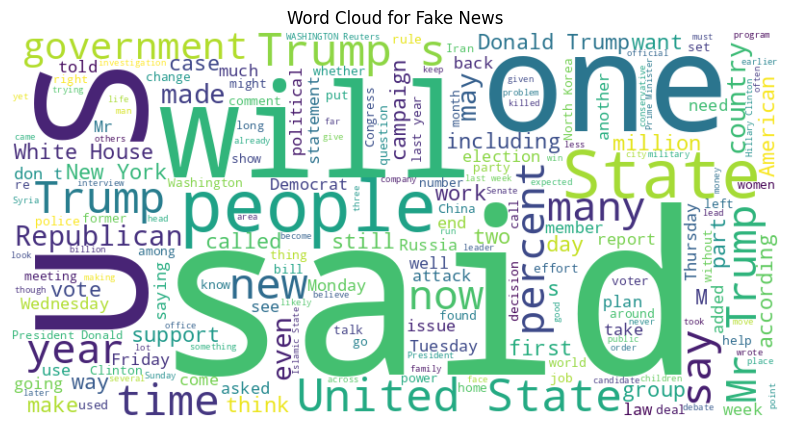

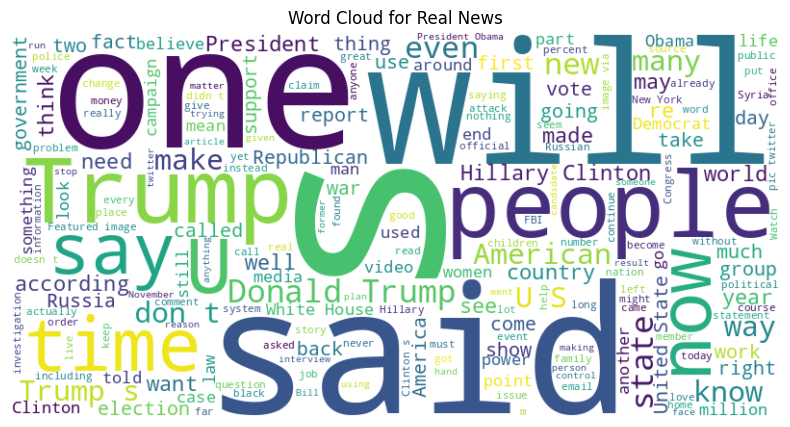

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Assuming 'text' is the column containing the news text and 'label' is the column containing the labels (0 for fake, 1 for real)
fake_news_text = ' '.join(df[df['label'] == 0]['text'])
real_news_text = ' '.join(df[df['label'] == 1]['text'])


# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for fake and real news
generate_wordcloud(fake_news_text, 'Word Cloud for Fake News')
generate_wordcloud(real_news_text, 'Word Cloud for Real News')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


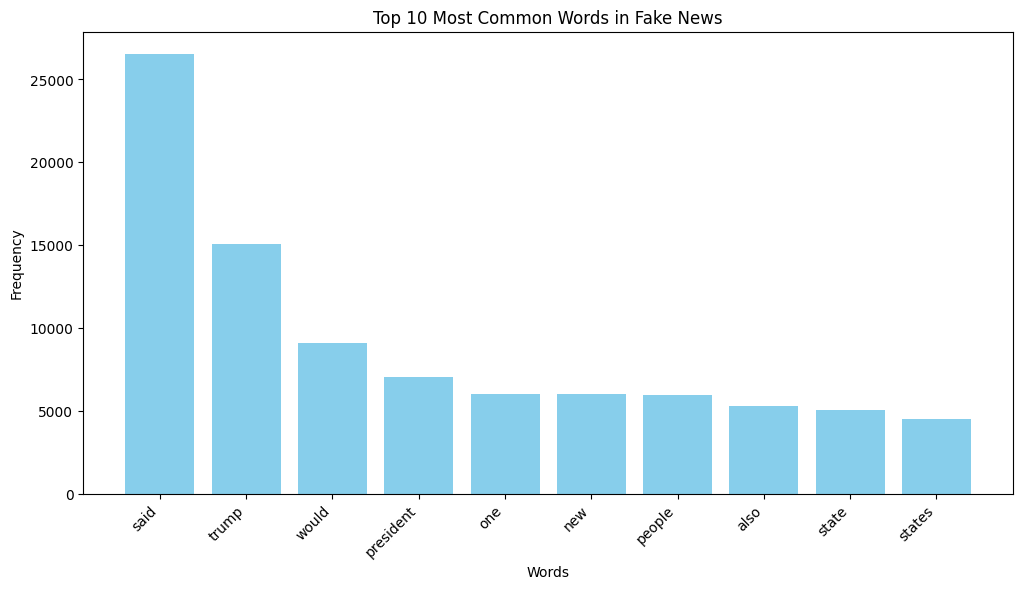

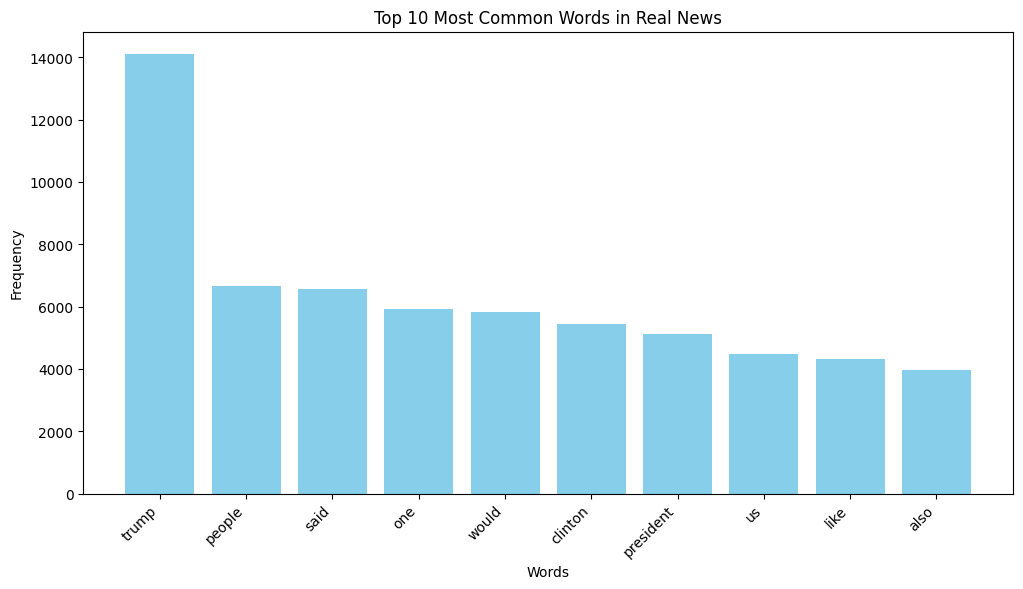

In [31]:

nltk.download('punkt')
nltk.download('stopwords')
def plot_most_common_words(text, title, n=10):
    words = nltk.word_tokenize(text)

    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]
    word_counts = Counter(words)
    common_words = word_counts.most_common(n)
    labels, counts = zip(*common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot most common words for fake and real news
plot_most_common_words(fake_news_text, 'Top 10 Most Common Words in Fake News')
plot_most_common_words(real_news_text, 'Top 10 Most Common Words in Real News')

In [35]:
# Text processing

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    teks = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    teks = teks.lower()
    teks = teks.split()
    teks = [ps.stem(word) for word in teks if not word in stopwords.words('english')]
    teks = ' '.join(teks)
    corpus.append(teks)

corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dozen polit activ pastor came privat dinner friday night hear convers stori uniqu context presidenti polit louisiana gov bobbi jindal travel hinduism protest christian ultim becam call evangel cathol two hour jindal recal talk girl high school want save soul read bibl closet parent would see feel stir watch movi senior year depict jesu cross struck struck hard jindal told pastor son god die sin jindal session christian clergi lead congreg earli presidenti battleground state iowa south carolina part behind scene effort louisiana governor find polit base could help propel top tier republican candid seek run white hous known gop circl mostli masteri polici issu health care jindal rhode scholar graduat ivi leagu brown univers obviou pool activist support help drive excit outsid home state har religi experi way begun appeal part gop influenti core religi conserv mani yet find favorit among republican eye presidenti race potenti gop candid woo evangel base includ sen rand paul ky ted cruz 

In [37]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df['label']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accuracy:   0.921


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Confusion Matrix')

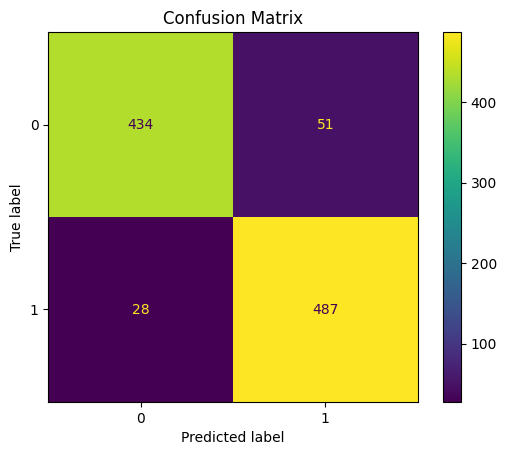

In [43]:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")


In [44]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidf_v.transform([review]).toarray()
    prediction = 'FAKE' if classifier.predict(review_vect) == 0 else 'REAL'
    return prediction

text = "Former CIA Openly Suggests He’s Like A Dictator"
prediction = predict(text)
print(prediction)

REAL


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
